In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To merge all the csvs we'll store all the csv downwloaded and stored in the 'sales data' folder 

files=[file for file in os.listdir(r'C:\Users\AMC\OneDrive\Desktop\sales data')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
all_months_data=pd.DataFrame()

In [4]:
for file in files:
    df=pd.read_csv(r"C:\Users\AMC\OneDrive\Desktop\sales data/"+file)
    all_months_data=pd.concat([all_months_data,df])
    
    
all_months_data.head()   

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
all_months_data.to_csv("Sales_data.csv",index=False)

In [6]:
df=pd.read_csv("Sales_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Data Cleaning

In [8]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
df.loc[517:30030]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215"
518,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
520,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301"
521,177056,Flatscreen TV,1,300,04/20/19 23:52,"180 9th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
30026,247804,34in Ultrawide Monitor,1,379.99,08/03/19 17:13,"132 Pine St, San Francisco, CA 94016"
30027,247805,AA Batteries (4-pack),1,3.84,08/24/19 12:20,"72 Church St, New York City, NY 10001"
30028,247806,Lightning Charging Cable,1,14.95,08/30/19 10:25,"836 Cherry St, Los Angeles, CA 90001"
30029,247807,Lightning Charging Cable,1,14.95,08/26/19 19:04,"802 Wilson St, Dallas, TX 75001"


## As  we merged 12 months of data (12 different CSV's), the headers of each csv are stored as a row in our df. So, we'll have to identify and drop those rows

In [12]:
df[df['Order Date']=='Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
df=df[df['Order Date']!='Order Date']

In [15]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [48]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


In [17]:
df.duplicated().sum()

264

In [18]:
df=df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

# Q1) Which was the best month for sale? How much was earned that month?

In [20]:
df['Month']=df['Order Date'].dt.month_name()

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [22]:
df['Month'].value_counts()

Month
December     24944
October      20249
April        18257
November     17544
May          16552
March        15128
July         14275
June         13535
February     11957
August       11943
September    11603
January       9699
Name: count, dtype: int64

In [23]:
df['Sales']=df['Quantity Ordered'].astype(float) * df['Price Each'].astype(float)

In [24]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,8.97
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,379.99


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  object        
 3   Price Each        185686 non-null  object        
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  object        
 7   Sales             185686 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 12.8+ MB


In [26]:
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')


## REVENUE BY PRODUCT FOR EACH MONTH

### ALTHOUGH WE COULD'VE JUST CHECKED THE REVENUE, BUT I WANTED TO SEE IF ANY PRODUCT HAD A HIGHER DEMAND IN A SPECIFIC MONTH OR NOT

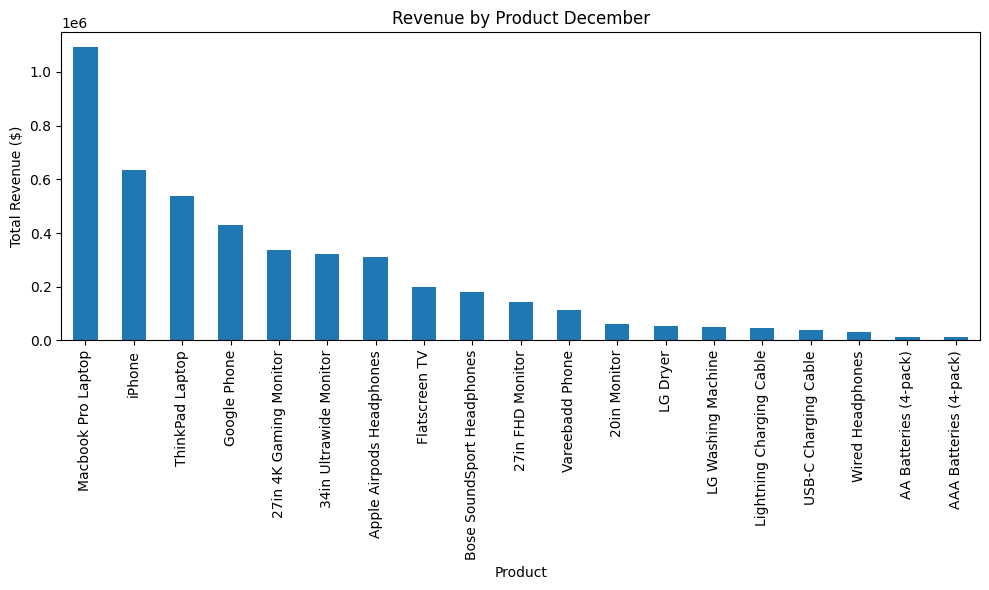

In [27]:
dsales=df[df['Month']=='December']
grouped1=dsales.groupby('Product')['Sales'].sum().sort_values(ascending=False)
grouped1.plot(kind='bar',figsize=(10,6))
plt.ylabel('Total Revenue ($)')
plt.title('Revenue by Product December')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [31]:
dsales_revenue=dsales['Sales'].sum()
#December Revenue
print('December Revenue: ',dsales_revenue)

December Revenue:  4608295.7


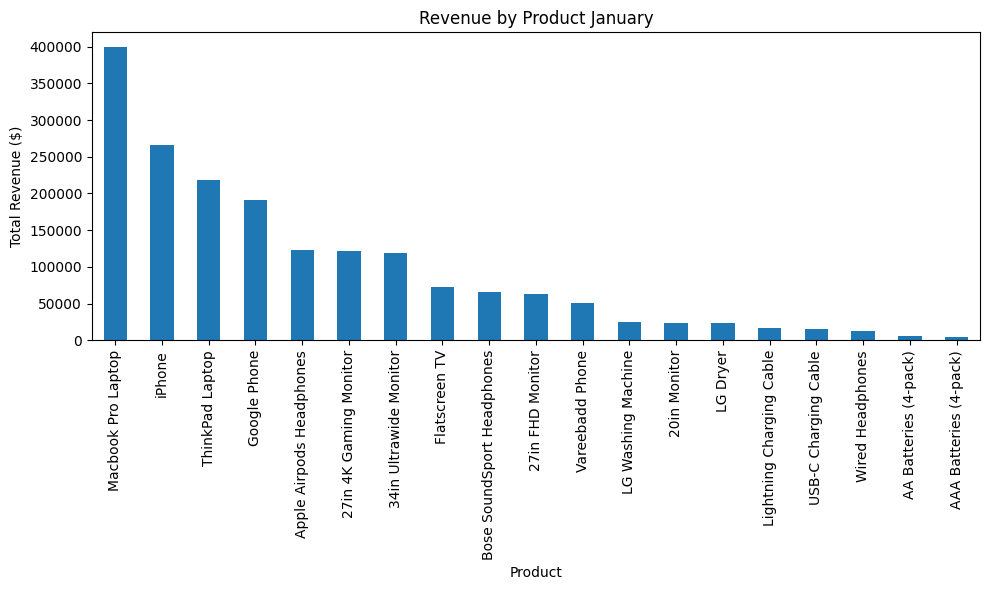

In [32]:
jsales=df[df['Month']=='January']
grouped2=jsales.groupby('Product')['Sales'].sum().sort_values(ascending=False)
grouped2.plot(kind='bar',figsize=(10,6))
plt.ylabel('Total Revenue ($)')
plt.title('Revenue by Product January')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [33]:
jsales_revenue=jsales['Sales'].sum()
print('January Sales: ',jsales_revenue)

January Sales:  1821413.1599999997


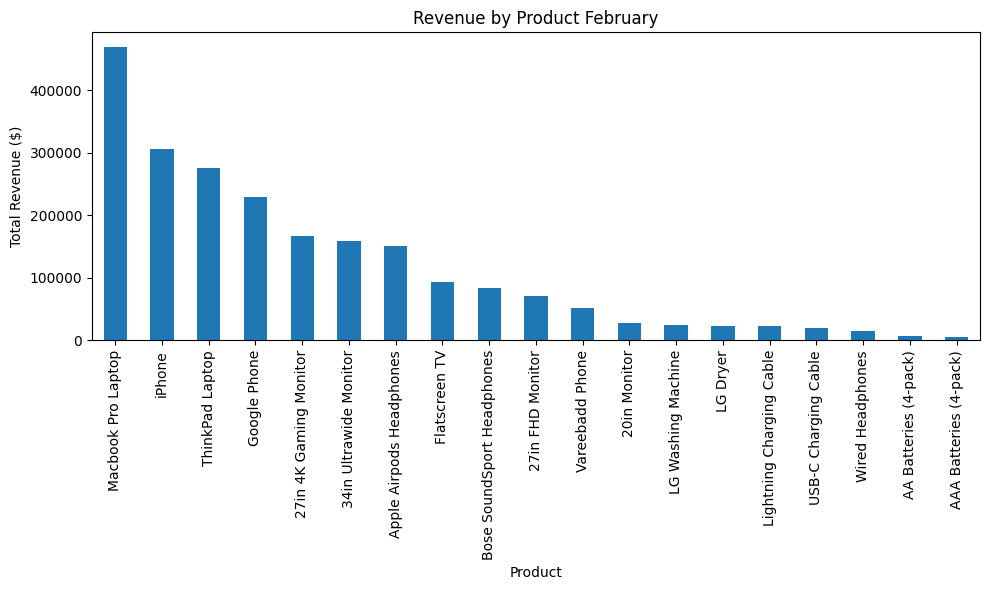

In [34]:
fsales=df[df['Month']=='February']
grouped3=fsales.groupby('Product')['Sales'].sum().sort_values(ascending=False)
grouped3.plot(kind='bar',figsize=(10,6))
plt.ylabel('Total Revenue ($)')
plt.title('Revenue by Product February')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [37]:
fsales_revenue=fsales['Sales'].sum()
print('Febraury Sales: ',fsales_revenue)

Febraury Sales:  2200078.0799999996


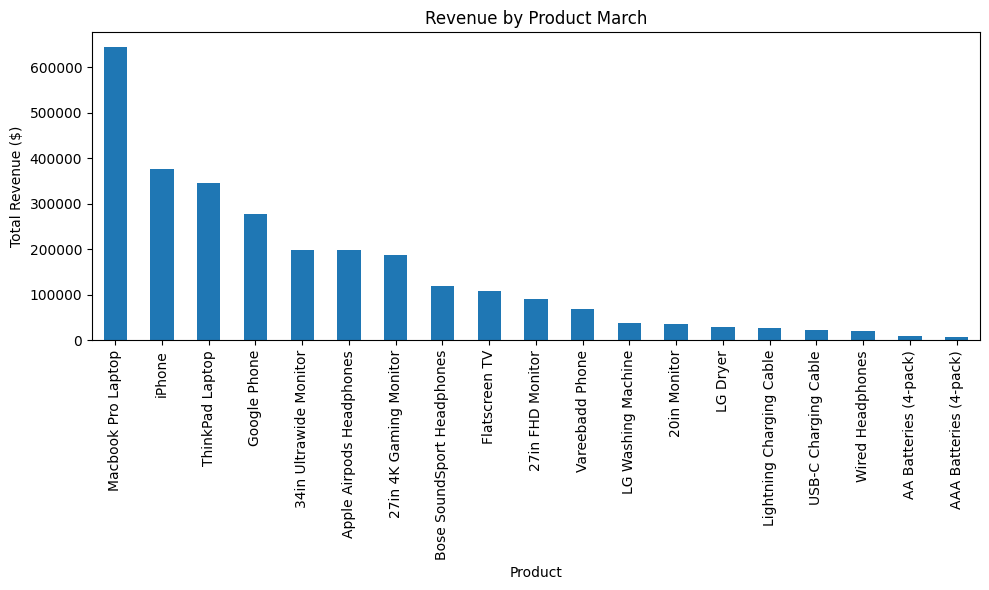

In [38]:
marsales=df[df['Month']=='March']
grouped4=marsales.groupby('Product')['Sales'].sum().sort_values(ascending=False)
grouped4.plot(kind='bar',figsize=(10,6))
plt.ylabel('Total Revenue ($)')
plt.title('Revenue by Product March')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [39]:
marsales_revenue=marsales['Sales'].sum()
print('March Sales: ',marsales_revenue)

March Sales:  2804973.3499999996


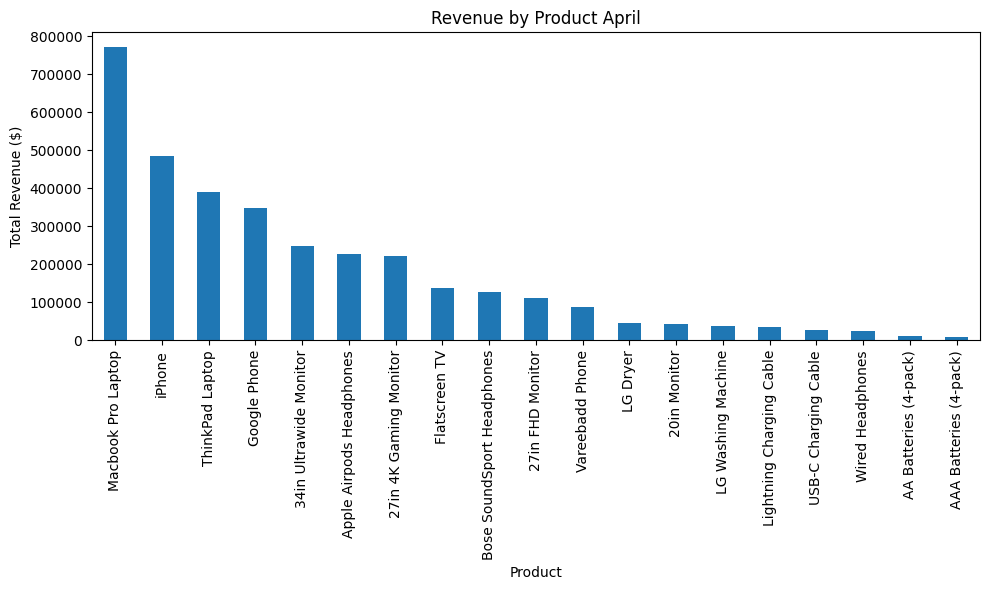

In [40]:
apsales=df[df['Month']=='April']
grouped=apsales.groupby('Product')['Sales'].sum().sort_values(ascending=False)
grouped.plot(kind='bar',figsize=(10,6))
plt.ylabel('Total Revenue ($)')
plt.title('Revenue by Product April')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [41]:
apsales_revenue=apsales['Sales'].sum()
print('April Sales: ',apsales_revenue)

April Sales:  3389217.9799999995


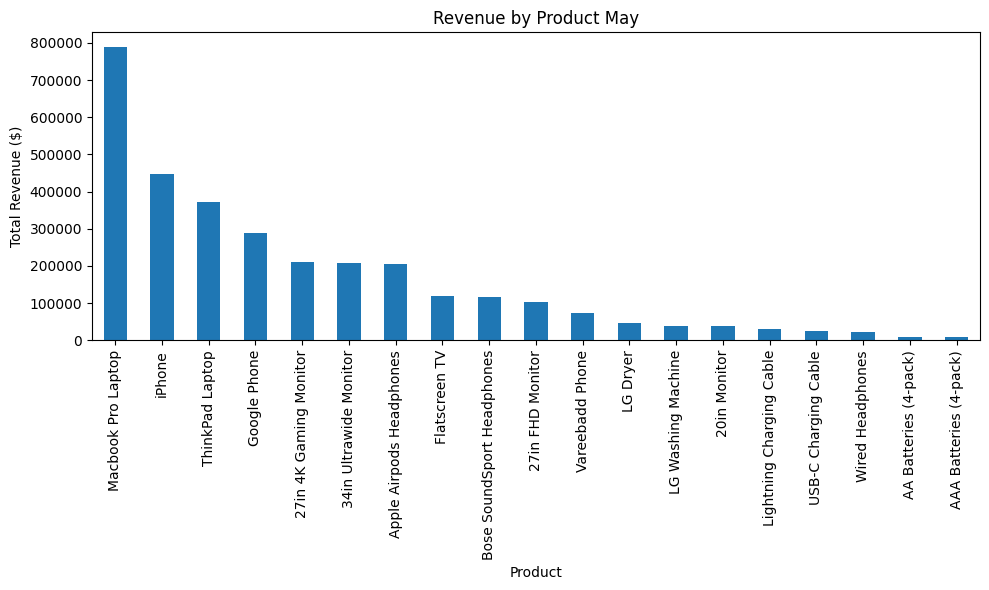

In [42]:
maysales=df[df['Month']=='May']
grouped=maysales.groupby('Product')['Sales'].sum().sort_values(ascending=False)
grouped.plot(kind='bar',figsize=(10,6))
plt.ylabel('Total Revenue ($)')
plt.title('Revenue by Product May')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [43]:
maysales_revenue=maysales['Sales'].sum()
print('April Sales: ',maysales_revenue)

April Sales:  3150616.23


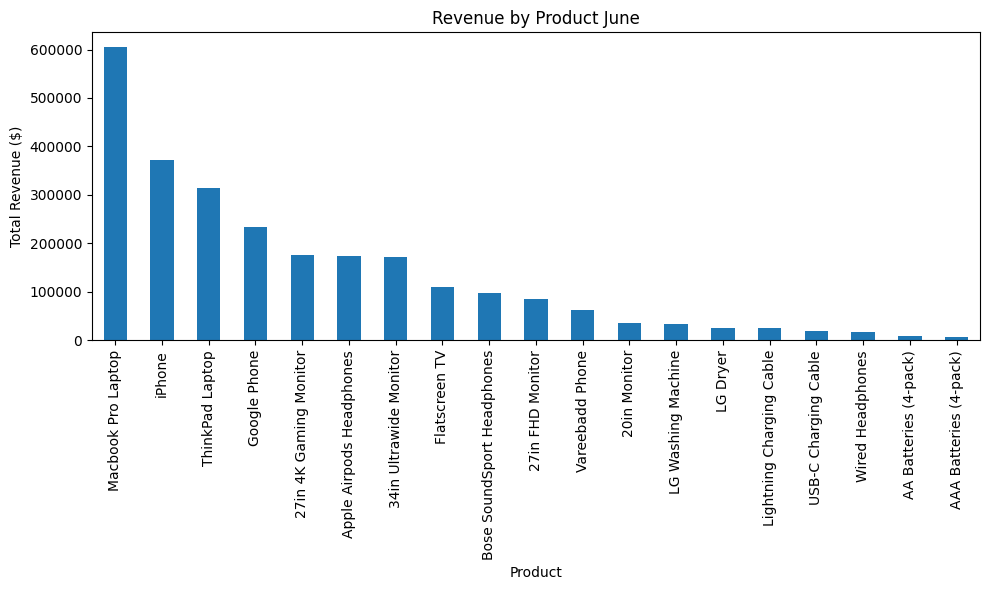

In [44]:
junesales=df[df['Month']=='June']
grouped=junesales.groupby('Product')['Sales'].sum().sort_values(ascending=False)
grouped.plot(kind='bar',figsize=(10,6))
plt.ylabel('Total Revenue ($)')
plt.title('Revenue by Product June')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [45]:
junesales_revenue=junesales['Sales'].sum()
print('June Sales: ',junesales_revenue)

June Sales:  2576280.15


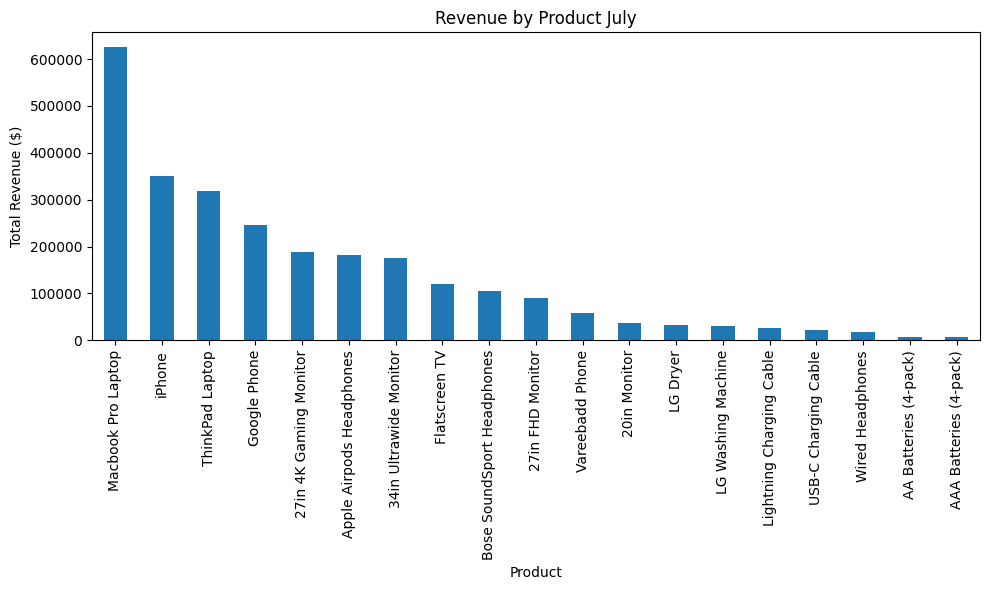

In [47]:
julysales=df[df['Month']=='July']
grouped=julysales.groupby('Product')['Sales'].sum().sort_values(ascending=False)
grouped.plot(kind='bar',figsize=(10,6))
plt.ylabel('Total Revenue ($)')
plt.title('Revenue by Product July')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [48]:
julysales_revenue=julysales['Sales'].sum()
print('July sales: ',julysales_revenue)

July sales:  2646461.3199999994


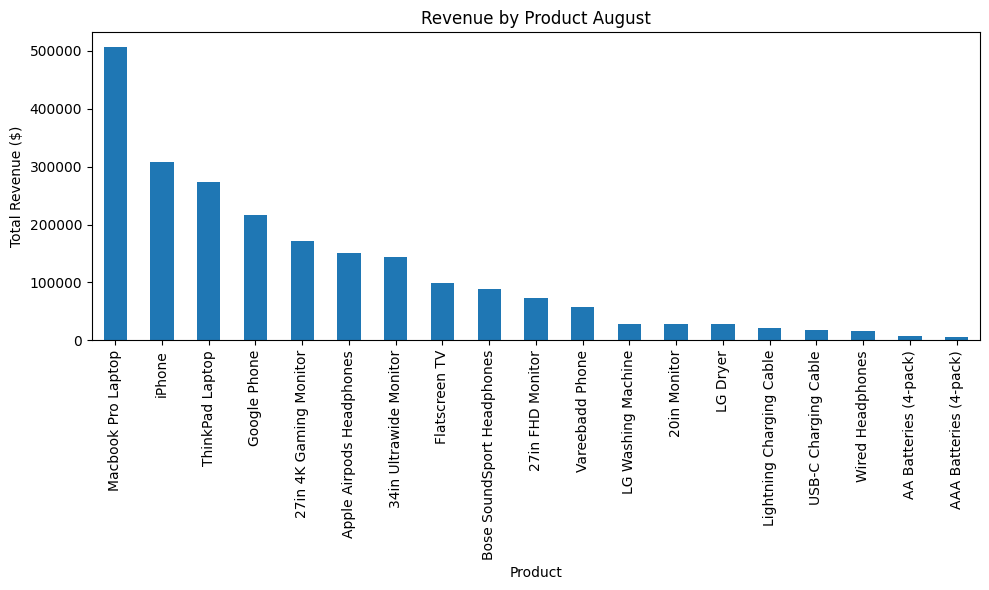

In [49]:
augsales=df[df['Month']=='August']
grouped=augsales.groupby('Product')['Sales'].sum().sort_values(ascending=False)
grouped.plot(kind='bar',figsize=(10,6))
plt.ylabel('Total Revenue ($)')
plt.title('Revenue by Product August')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [50]:
augsales_revenue=augsales['Sales'].sum()
print('August Sales: ',augsales_revenue)

August Sales:  2241083.3699999996


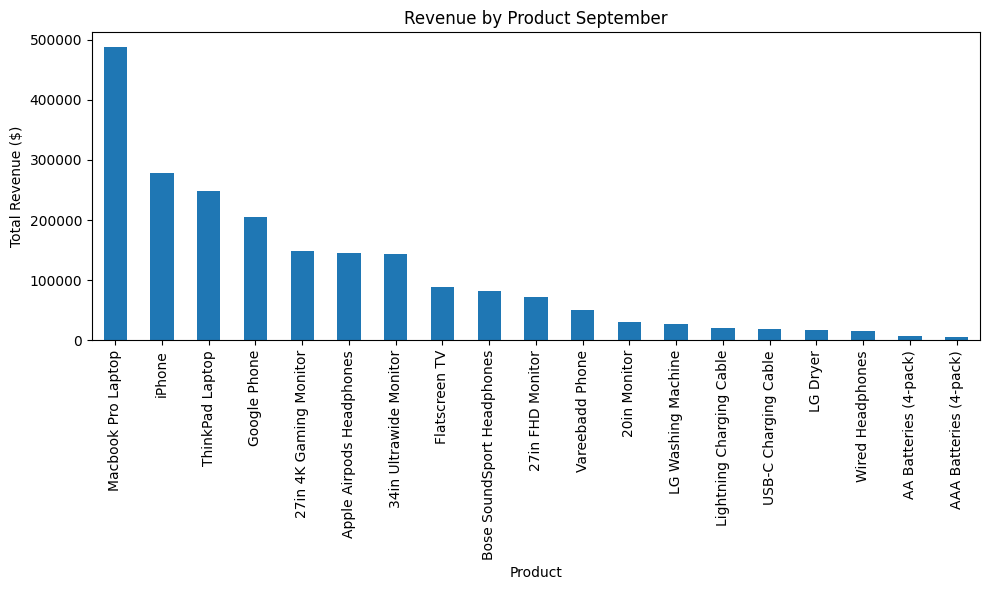

In [51]:
septsales=df[df['Month']=='September']
grouped=septsales.groupby('Product')['Sales'].sum().sort_values(ascending=False)
grouped.plot(kind='bar',figsize=(10,6))
plt.ylabel('Total Revenue ($)')
plt.title('Revenue by Product September')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [52]:
septsales_revenue=septsales['Sales'].sum()
print('September Sales: ',septsales_revenue)

September Sales:  2094465.6899999995


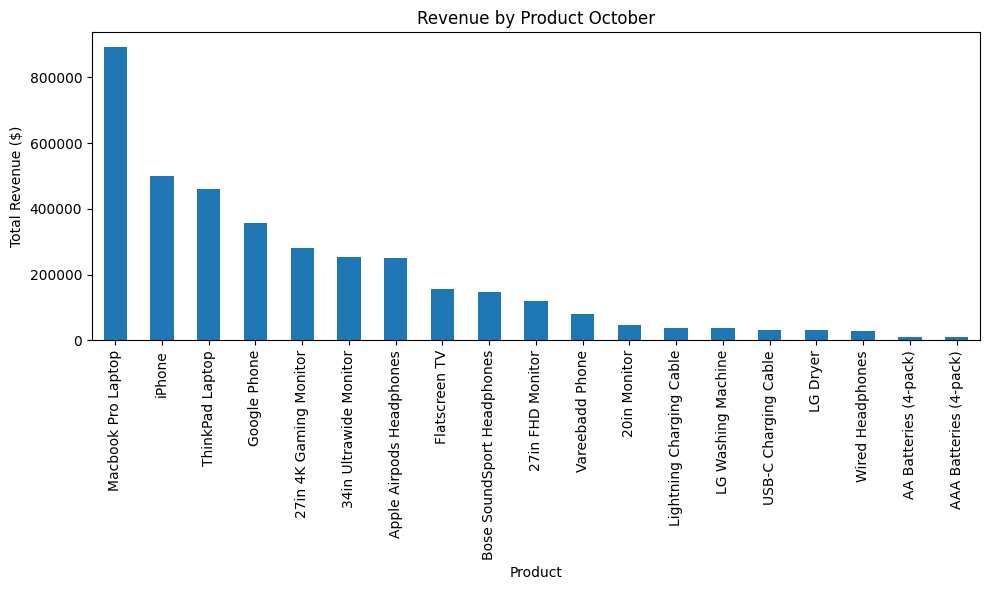

In [53]:
octsales=df[df['Month']=='October']
grouped=octsales.groupby('Product')['Sales'].sum().sort_values(ascending=False)
grouped.plot(kind='bar',figsize=(10,6))
plt.ylabel('Total Revenue ($)')
plt.title('Revenue by Product October')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [54]:
octsales_revenue=octsales['Sales'].sum()
print('October Sales',octsales_revenue)

October Sales 3734777.8599999994


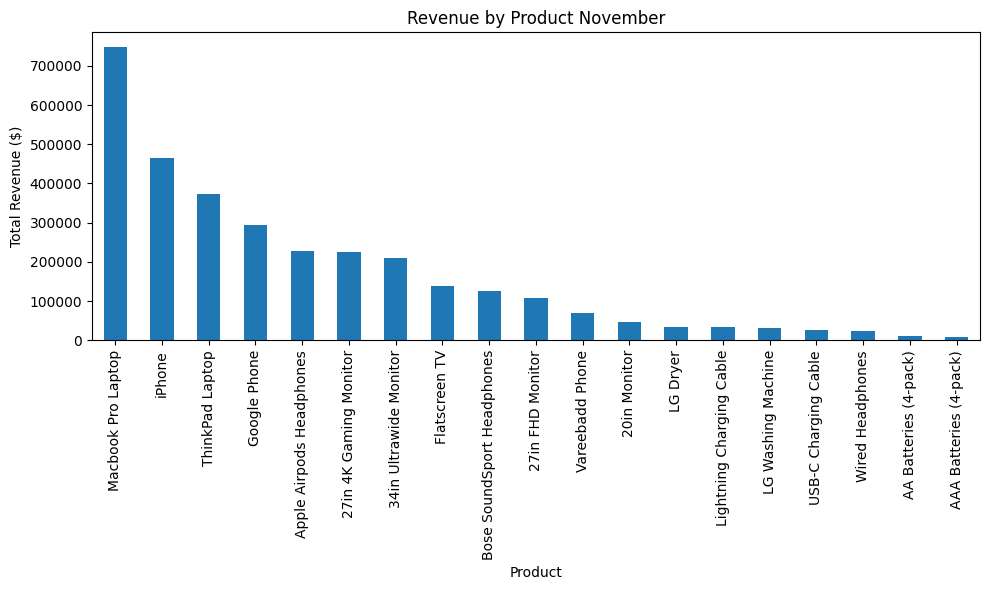

In [57]:
novsales=df[df['Month']=='November']
grouped=novsales.groupby('Product')['Sales'].sum().sort_values(ascending=False)
grouped.plot(kind='bar',figsize=(10,6))
plt.ylabel('Total Revenue ($)')
plt.title('Revenue by Product November')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [58]:
novsales_revenue=novsales['Sales'].sum()
print('November Sales: ',novsales_revenue)

November Sales:  3197875.05


In [82]:
Revenue = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December'],
    'Revenue': [jsales_revenue, fsales_revenue, marsales_revenue, apsales_revenue,
                maysales_revenue, junesales_revenue, julysales_revenue, augsales_revenue,
                septsales_revenue, octsales_revenue, novsales_revenue, dsales_revenue]
}


In [83]:
revenuedf=pd.DataFrame(Revenue)


In [84]:
revenuedf

,Month,Revenue
0,January,1821413.16
1,February,2200078.08
2,March,2804973.35
3,April,3389217.98
4,May,3150616.23
5,June,2576280.15
6,July,2646461.32
7,August,2241083.37
8,September,2094465.69
9,October,3734777.86


<Axes: >

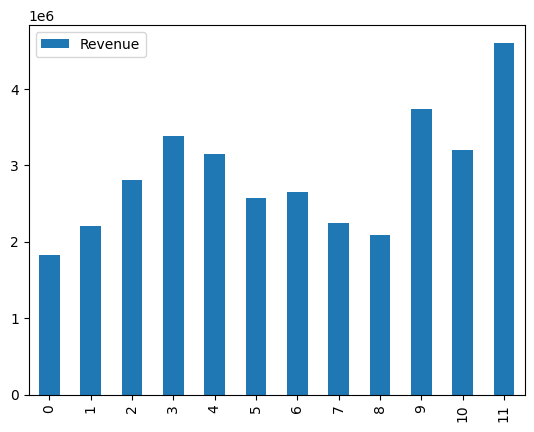

In [85]:
revenuedf.plot(kind='bar')

In [86]:
df.groupby('Month')['Sales'].sum()

Month
April        3389217.98
August       2241083.37
December     4608295.70
February     2200078.08
January      1821413.16
July         2646461.32
June         2576280.15
March        2804973.35
May          3150616.23
November     3197875.05
October      3734777.86
September    2094465.69
Name: Sales, dtype: float64

In [87]:
df.to_csv('Sales_data 7aug.csv', index=False)
revenuedf.to_csv('Sales_Revenue.csv',index=False)

In [88]:
df=pd.read_csv('Sales_data 7aug.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99


In [89]:
revenue=pd.read_csv('Sales_Revenue.csv')
revenue

,Month,Revenue
0,January,1821413.16
1,February,2200078.08
2,March,2804973.35
3,April,3389217.98
4,May,3150616.23
5,June,2576280.15
6,July,2646461.32
7,August,2241083.37
8,September,2094465.69
9,October,3734777.86


In [90]:
import matplotlib.ticker as ticker

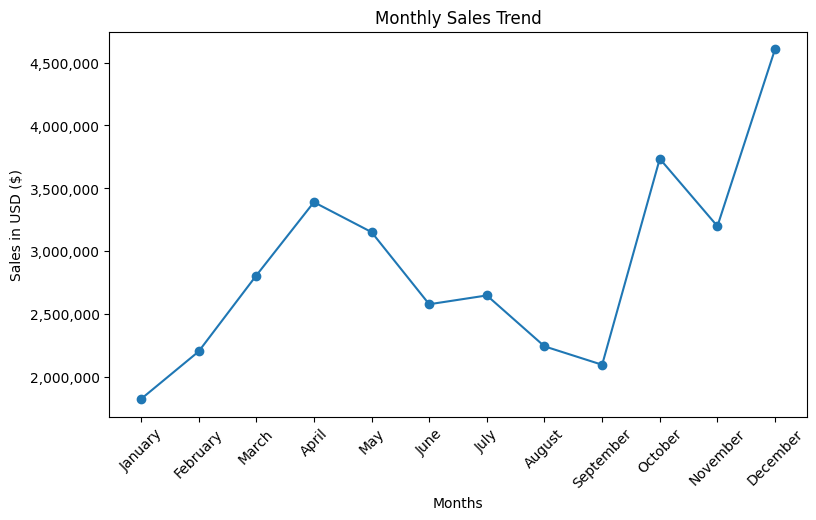

In [115]:
plt.figure(figsize=(9,5))
plt.plot(revenue['Month'],revenue['Revenue'],marker='o', linestyle='-')

plt.title('Monthly Sales Trend')
#To fix the values being displayed on the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xlabel('Months')
plt.xticks(rotation=45)
plt.ylabel('Sales in USD ($)')
plt.show()

## HENCE DECEMBER IS THE MONTH WITH HIGHEST REVENUE

**Maybe because of the Holidays season**

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  int64  
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
 6   Month             185686 non-null  object 
 7   Sales             185686 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 11.3+ MB


### Q2) What City had the highest number of sales?


In [93]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales'],
      dtype='object')

In [94]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99


In [131]:
df['City']=df['Purchase Address'].apply(lambda x: x.split(',')[1] +'(' + x.split(',')[2].split(' ')[1] + ')')



#This + part is to get the state as well and remove the zip code by picking the 1st element after whitespace as we can see theres whitespace both on left and right of the states
#Why we add states? Because some cities might got the same name so we don't get fake duplicates

In [132]:
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas(TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston(MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles(CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA)


In [133]:
df['City'].unique()

array([' Dallas(TX)', ' Boston(MA)', ' Los Angeles(CA)',
       ' San Francisco(CA)', ' Seattle(WA)', ' Atlanta(GA)',
       ' New York City(NY)', ' Portland(OR)', ' Austin(TX)',
       ' Portland(ME)'], dtype=object)

In [134]:
result=df.groupby('City')['Sales'].sum()
result

City
Atlanta(GA)          2794199.07
Austin(TX)           1818044.33
Boston(MA)           3658627.65
Dallas(TX)           2765373.96
Los Angeles(CA)      5448304.28
New York City(NY)    4661867.14
Portland(ME)          449321.38
Portland(OR)         1870010.56
San Francisco(CA)    8254743.55
Seattle(WA)          2745046.02
Name: Sales, dtype: float64

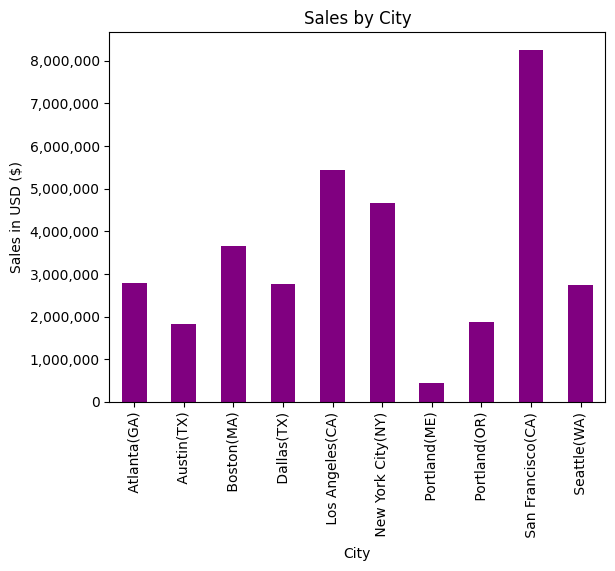

In [149]:
result.plot(kind='bar',color='purple',title='Sales by City')

#To fix the values being displayed on the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))


plt.xticks(rotation=90)
plt.ylabel('Sales in USD ($)')

plt.show()

In [138]:
result.to_frame()

,Sales
City,
Atlanta(GA),2794199.07
Austin(TX),1818044.33
Boston(MA),3658627.65
Dallas(TX),2765373.96
Los Angeles(CA),5448304.28
New York City(NY),4661867.14
Portland(ME),449321.38
Portland(OR),1870010.56
San Francisco(CA),8254743.55


### CITY WITH HIGHEST SALES IS SAN FRANCISCO

In [151]:
df.to_csv('SalesData_9Aug.csv',index=False)

### Q3) What Time should we display advertisement to maximize the likelihood of customer's buying product?

In [2]:
df=pd.read_csv("SalesData_9Aug.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas(TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston(MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles(CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  int64  
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
 6   Month             185686 non-null  object 
 7   Sales             185686 non-null  float64
 8   City              185686 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 12.8+ MB


In [4]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas(TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston(MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles(CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Month             185686 non-null  object        
 7   Sales             185686 non-null  float64       
 8   City              185686 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 12.8+ MB


In [14]:
df['Hour']=df['Order Date'].dt.hour

In [15]:
df['Minute']=df['Order Date'].dt.minute

In [16]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas(TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston(MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles(CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA),9,27


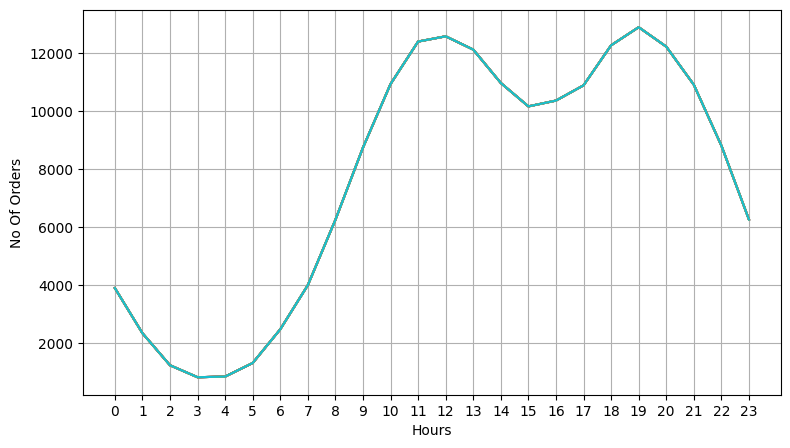

In [29]:
hours=[hour for hour, result in df.groupby('Hour')]
plt.figure(figsize=(9,5))
plt.plot(hours,df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('No Of Orders')
plt.grid()
plt.show()

### The graph suggests that the highest number of order that comes are either between 11am-12am or 6pm-7pm which makes sense, the customers are either shopping early in the morning or after work. 

In [26]:
df.groupby(['Hour']).count()
#shows no of orders in each hour

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3902,3902,3902,3902,3902,3902,3902,3902,3902,3902
1,2347,2347,2347,2347,2347,2347,2347,2347,2347,2347
2,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242
3,830,830,830,830,830,830,830,830,830,830
4,852,852,852,852,852,852,852,852,852,852
5,1320,1320,1320,1320,1320,1320,1320,1320,1320,1320
6,2481,2481,2481,2481,2481,2481,2481,2481,2481,2481
7,4002,4002,4002,4002,4002,4002,4002,4002,4002,4002
8,6252,6252,6252,6252,6252,6252,6252,6252,6252,6252


In [35]:
df['City'].unique()

array([' Dallas(TX)', ' Boston(MA)', ' Los Angeles(CA)',
       ' San Francisco(CA)', ' Seattle(WA)', ' Atlanta(GA)',
       ' New York City(NY)', ' Portland(OR)', ' Austin(TX)',
       ' Portland(ME)'], dtype=object)

In [41]:
sf=df[df['City']== ' San Francisco(CA)']
sf

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
5,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",April,11.95,San Francisco(CA),13,3
8,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",April,1700.00,San Francisco(CA),10,38
16,176573,USB-C Charging Cable,1,11.95,2019-04-27 18:41:00,"214 Chestnut St, San Francisco, CA 94016",April,11.95,San Francisco(CA),18,41
28,176584,Flatscreen TV,1,300.00,2019-04-24 20:39:00,"936 Church St, San Francisco, CA 94016",April,300.00,San Francisco(CA),20,39
30,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,San Francisco(CA),17,0
...,...,...,...,...,...,...,...,...,...,...,...
185680,259352,USB-C Charging Cable,1,11.95,2019-09-07 15:49:00,"976 Forest St, San Francisco, CA 94016",September,11.95,San Francisco(CA),15,49
185682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00,San Francisco(CA),16,0
185683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,700.00,San Francisco(CA),7,39
185684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,379.99,San Francisco(CA),17,30


In [54]:
order_counts=df.groupby(['Hour','City']).size().reset_index(name='OrderCounts')
order_counts
#size or count same shii

,Hour,City,OrderCounts
0,0,Atlanta(GA),310
1,0,Austin(TX),198
2,0,Boston(MA),426
3,0,Dallas(TX),283
4,0,Los Angeles(CA),634
...,...,...,...
235,23,New York City(NY),809
236,23,Portland(ME),64
237,23,Portland(OR),322
238,23,San Francisco(CA),1459


In [55]:
pivot_df = order_counts.pivot(index='Hour', columns='City', values='OrderCounts').fillna(0)
pivot_df


City,Atlanta(GA),Austin(TX),Boston(MA),Dallas(TX),Los Angeles(CA),New York City(NY),Portland(ME),Portland(OR),San Francisco(CA),Seattle(WA)
Hour,,,,,,,,,,
0,310,198,426,283,634,557,48,223,937,286
1,213,128,220,168,397,328,34,123,569,167
2,112,70,119,92,197,164,14,71,315,88
3,57,54,80,69,116,100,11,47,219,77
4,80,42,90,55,124,106,11,51,217,76
5,98,70,120,99,209,204,14,72,343,91
6,191,129,287,197,357,336,40,119,630,195
7,349,217,394,318,629,515,56,227,988,309
8,509,335,703,517,965,857,83,325,1471,487


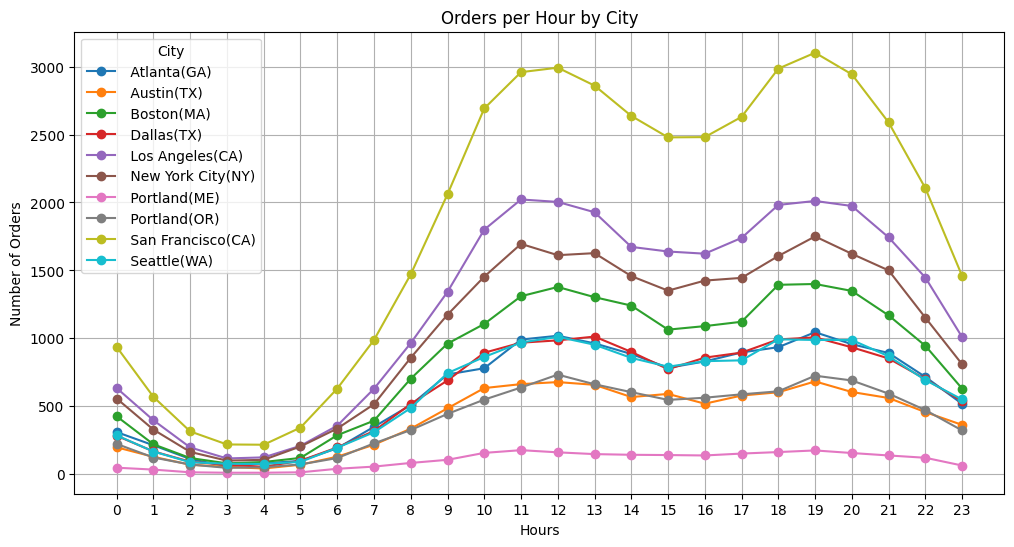

In [63]:
pivot_df.plot(kind='line',marker='o',figsize=(12,6))
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.title('Orders per Hour by City')
plt.legend(title='City')
plt.grid()
plt.show()

### Q4) What products are often most sold together?

In [64]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas(TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston(MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles(CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA),9,27


In [66]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Minute'],
      dtype='object')

In [69]:
df1=df[df['Order ID'].duplicated(keep=False)]
df1.head()
#(keep=False)You’d use it if you want to remove all rows that have duplicates, not just the extra copies:
#it strips or extracts all the duplicated order ids into the new dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles(CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA),14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles(CA),19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,Los Angeles(CA),19,42
30,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,San Francisco(CA),17,0


In [71]:
df1['grouped']=df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df1.head()

C:\Users\AMC\AppData\Local\Temp\ipykernel_9280\1277447723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['grouped']=df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,Los Angeles(CA),19,42,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,Los Angeles(CA),19,42,"Google Phone,USB-C Charging Cable"
30,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",April,5.98,San Francisco(CA),17,0,"AAA Batteries (4-pack),Google Phone"


In [74]:
df1=df1[['Order ID','grouped']].drop_duplicates()
df1.head()

,Order ID,grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [80]:
from itertools import combinations
from collections import Counter


count=Counter()

for row in df1['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(30):
    print(key,value)
    

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Charging Cable') 50
('Apple Airpods Headphones', 'AAA Batteries (4-

### 'iPhone', 'Lightning Charging Cable' are the items most often sold together

In [81]:
df.to_csv('SalesData_10Aug.csv',index=False)

In [2]:
df=pd.read_csv('SalesData_10Aug.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas(TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston(MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles(CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA),9,27


### Q5) What product was sold the most? Why do you think it sold the most?

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas(TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston(MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles(CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles(CA),9,27


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  int64  
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
 6   Month             185686 non-null  object 
 7   Sales             185686 non-null  float64
 8   City              185686 non-null  object 
 9   Hour              185686 non-null  int64  
 10  Minute            185686 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 15.6+ MB


In [60]:
pg=df.groupby('Product')['Quantity Ordered'].sum()


In [15]:
pg.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        30986
AA Batteries (4-pack)         27615
USB-C Charging Cable          23931
Lightning Charging Cable      23169
Wired Headphones              20524
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
27in FHD Monitor               7541
iPhone                         6847
27in 4K Gaming Monitor         6239
34in Ultrawide Monitor         6192
Google Phone                   5529
Flatscreen TV                  4813
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
20in Monitor                   4126
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [63]:
products=[product for product,result in df.groupby('Product')]
plt.figure(figsize=(6,4))
plt.bar(products,pg)
plt.xticks(products,rotation=90)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.title('Product Sold Most')
plt.show()


ValueError: Image size of 194277x589 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 600x400 with 1 Axes>

### The product sold the most is AAA Batteries (4-pack), why i think they are sold the most is might be because they are cheap and are needed with almost every other item so they might be purchased together if not alone itself

In [36]:
prices=df.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\AMC\AppData\Local\Temp\ipykernel_524\1751277113.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products,rotation=90)


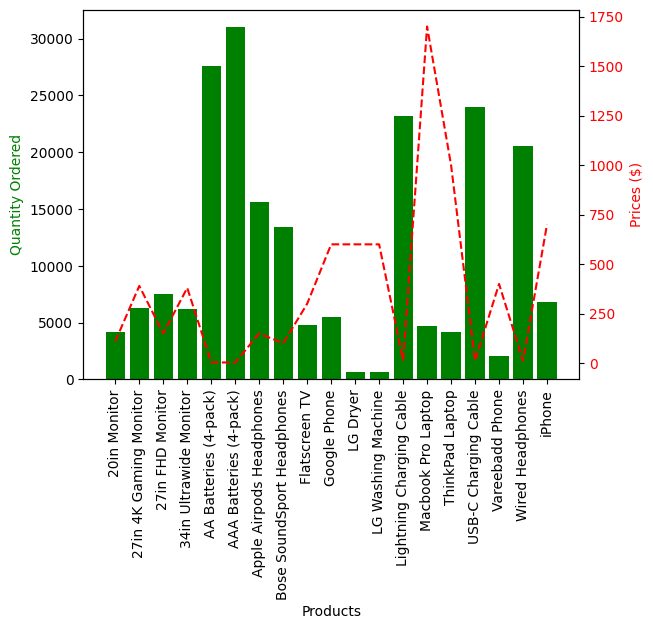

In [41]:
fig, ax1= plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,pg,color='g')
ax2.plot(products, prices, 'r--')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Prices ($)', color='r')
ax2.tick_params(axis='y', labelcolor='r') #They just display values on secondary y-axis in color red
ax1.set_xticklabels(products,rotation=90)

plt.show()

### This backs my hypothesis that the AAA Batteries have lower price hence they are sold the most as it is the case with most of the items, however there are some inconsistencies when you look at Products with higher prices like LG Dryer or LG Washing machine they are less sold while Macbook and Thinkpad are sold rather more having even higher prices. This could be because there is higher demand for Macbook than a washing machine or a dryer